# HR Churn - Fast Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

file = 'turnover.csv'
url  = 'https://assets.datacamp.com/production/course_6221/datasets/' + file
urlretrieve(url, file)
hr_df = pd.read_csv(file)
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [2]:
cat_cols = ['department', 'salary']
for col in cat_cols:
    hr_df[col] = hr_df[col].astype('category')

X = pd.get_dummies(hr_df.drop('churn', axis='columns'))
y = hr_df.churn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [3]:
X_train.shape, X_test.shape

((11249, 20), (3750, 20))

Model Score:  0.7904
F1 Score:  0.45942228335625857
[[2630  227]
 [ 559  334]]


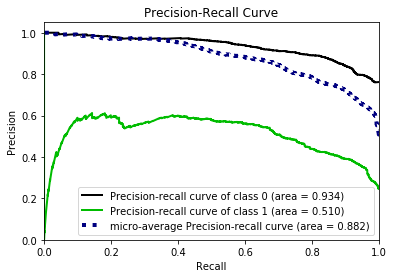

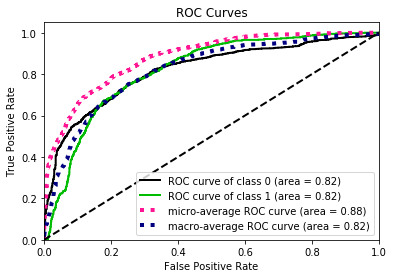

In [8]:
# Logistic model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Model Score: ", clf.score(X_test, y_test))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

import scikitplot as skplt
y_prob = clf.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_prob)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

Model Score:  0.9834666666666667
F1 Score:  0.9643678160919542
[[2849    8]
 [  54  839]]


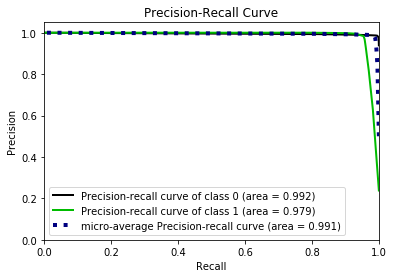

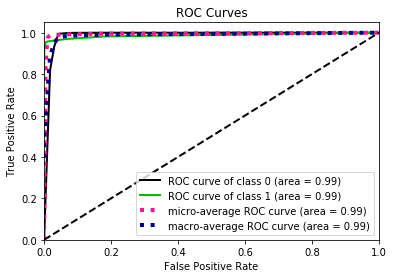

In [9]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Model Score: ", clf.score(X_test, y_test))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

import scikitplot as skplt
y_prob = clf.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_prob)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

In [36]:
# Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, softmax, sigmoid

# data as numpy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

def create_model(optimizer='rmsprop', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(50, input_dim=20, kernel_initializer=init, activation='relu'))
    model.add(Dense(10, input_dim=20, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# explore tensorboard of a very simple model
from keras.callbacks import TensorBoard
tb = TensorBoard(log_dir='./logs', histogram_freq=0,
            batch_size=32, write_graph=True,
            write_grads=False, write_images=False,
            embeddings_freq=0, embeddings_layer_names=None,
            embeddings_metadata=None, embeddings_data=None)

In [24]:
"""
$ figlet -f doh stop!

                          tttt                                                !!!
                       ttt:::t                                               !!:!!
                       t:::::t                                               !:::!
                       t:::::t                                               !:::!
    ssssssssss   ttttttt:::::ttttttt       ooooooooooo   ppppp   ppppppppp   !:::!
  ss::::::::::s  t:::::::::::::::::t     oo:::::::::::oo p::::ppp:::::::::p  !:::!
ss:::::::::::::s t:::::::::::::::::t    o:::::::::::::::op:::::::::::::::::p !:::!
s::::::ssss:::::stttttt:::::::tttttt    o:::::ooooo:::::opp::::::ppppp::::::p!:::!
 s:::::s  ssssss       t:::::t          o::::o     o::::o p:::::p     p:::::p!:::!
   s::::::s            t:::::t          o::::o     o::::o p:::::p     p:::::p!:::!
      s::::::s         t:::::t          o::::o     o::::o p:::::p     p:::::p!!:!!
ssssss   s:::::s       t:::::t    tttttto::::o     o::::o p:::::p    p::::::p !!!
s:::::ssss::::::s      t::::::tttt:::::to:::::ooooo:::::o p:::::ppppp:::::::p
s::::::::::::::s       tt::::::::::::::to:::::::::::::::o p::::::::::::::::p  !!!
 s:::::::::::ss          tt:::::::::::tt oo:::::::::::oo  p::::::::::::::pp  !!:!!
  sssssssssss              ttttttttttt     ooooooooooo    p::::::pppppppp     !!!
                                                          p:::::p
                                                          p:::::p
                                                         p:::::::p
                                                         p:::::::p
                                                         p:::::::p
                                                         ppppppppp
"""
# STOP: Grid HyperParameter Search
# This takes nearly 4 hours!!!!

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# grid search epochs, batch size and optimizer
# smallest batch, largest epoch's (no surprise) - but interesting
# normal init, and rmsprop optimizer (rather than adam). 
# Best: 0.904880 using {'batch_size': 5, 'epochs': 15, 'init': 'normal', 'optimizer': 'rmsprop'}
optimizers = ['rmsprop', 'adam']
inits = ['glorot_uniform', 'normal', 'uniform']
epochs = [5, 10, 15]
batches = [5, 10, 20]

param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_np, y_train_np)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.904880 using {'batch_size': 5, 'epochs': 15, 'init': 'normal', 'optimizer': 'rmsprop'}
0.781136 (0.042954) with: {'batch_size': 5, 'epochs': 5, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.761934 (0.003740) with: {'batch_size': 5, 'epochs': 5, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.832785 (0.025148) with: {'batch_size': 5, 'epochs': 5, 'init': 'normal', 'optimizer': 'rmsprop'}
0.831452 (0.037644) with: {'batch_size': 5, 'epochs': 5, 'init': 'normal', 'optimizer': 'adam'}
0.855632 (0.015386) with: {'batch_size': 5, 'epochs': 5, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.791270 (0.047921) with: {'batch_size': 5, 'epochs': 5, 'init': 'uniform', 'optimizer': 'adam'}
0.664504 (0.299629) with: {'batch_size': 5, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.810116 (0.066414) with: {'batch_size': 5, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.902036 (0.005230) with: {'batch_size': 5, 'epochs': 10, 'init': 'normal', 'optimizer': 

Epoch 1/15
11249/11249 [==============================] - 7s 593us/step - loss: 0.5522 - acc: 0.7609
Epoch 2/15
11249/11249 [==============================] - 6s 525us/step - loss: 0.4557 - acc: 0.7716
Epoch 3/15
11249/11249 [==============================] - 6s 513us/step - loss: 0.3861 - acc: 0.8091
Epoch 4/15
11249/11249 [==============================] - 6s 508us/step - loss: 0.3494 - acc: 0.8448
Epoch 5/15
11249/11249 [==============================] - 6s 507us/step - loss: 0.3231 - acc: 0.8646
Epoch 6/15
11249/11249 [==============================] - 6s 520us/step - loss: 0.3115 - acc: 0.8715
Epoch 7/15
11249/11249 [==============================] - 6s 520us/step - loss: 0.3020 - acc: 0.8779
Epoch 8/15
11249/11249 [==============================] - 6s 526us/step - loss: 0.2937 - acc: 0.8811
Epoch 9/15
11249/11249 [==============================] - 7s 584us/step - loss: 0.2895 - acc: 0.8835
Epoch 10/15
11249/11249 [==============================] - 6s 556us/step - loss: 0.2829 - a

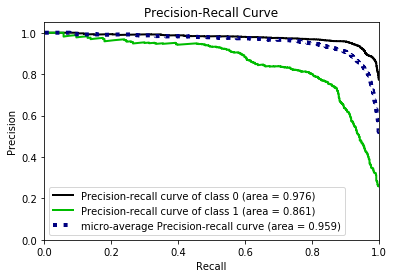

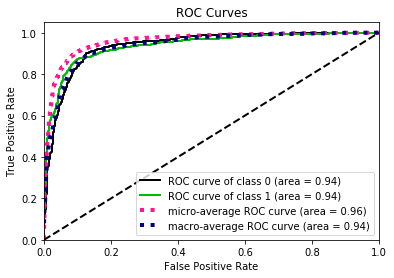

In [37]:
# Use best hyper-parameters - increase epoch
model = create_model(init='normal')
model.fit(X_train_np, y_train_np, epochs=15, batch_size=5, callbacks=[tb])
y_pred = (model.predict(X_test_np) > 0.5)

print(model.evaluate(X_train_np, y_train_np))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

import scikitplot as skplt
y_prob = model.predict(X_test_np)
y_prob = np.hstack((1-y_prob, y_prob))
skplt.metrics.plot_precision_recall(y_test, y_prob)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

Epoch 1/10
11249/11249 [==============================] - 10s 899us/step - loss: 0.5650 - acc: 0.7619
Epoch 2/10
11249/11249 [==============================] - 9s 784us/step - loss: 0.4944 - acc: 0.7674
Epoch 3/10
11249/11249 [==============================] - 9s 774us/step - loss: 0.3882 - acc: 0.8136
Epoch 4/10
11249/11249 [==============================] - 9s 782us/step - loss: 0.3393 - acc: 0.8504
Epoch 5/10
11249/11249 [==============================] - 9s 784us/step - loss: 0.3157 - acc: 0.8643
Epoch 6/10
11249/11249 [==============================] - 9s 820us/step - loss: 0.3055 - acc: 0.8715
Epoch 7/10
11249/11249 [==============================] - 9s 801us/step - loss: 0.2961 - acc: 0.8755
Epoch 8/10
11249/11249 [==============================] - 9s 800us/step - loss: 0.2897 - acc: 0.8841
Epoch 9/10
11249/11249 [==============================] - 9s 802us/step - loss: 0.2781 - acc: 0.8889
Epoch 10/10
11249/11249 [==============================] - 3s 241us/step
[0.25325649799225

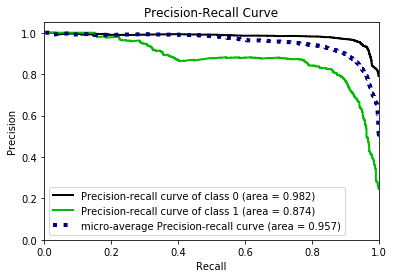

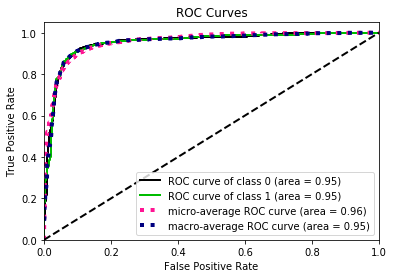

In [41]:
# try a deeper model to get closer to random forest score
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, sigmoid
from keras.optimizers import RMSprop
from keras.initializers import normal

np.random.seed(42)

def create_model_deep(optimizer='rmsprop', init='normal'):
    model = Sequential()
    model.add(Dense(250, input_dim=20, kernel_initializer=init, activation='relu'))
    model.add(Dense(250, kernel_initializer=init, activation='relu'))
    model.add(Dense(50, kernel_initializer=init, activation='relu'))
    model.add(Dense(10, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model, then train and predict
model = create_model_deep()
model.fit(X_train_np, y_train_np, epochs=10, batch_size=20, callbacks=[tb])
y_pred = (model.predict(X_test_np) > 0.5)

# Show scores
print(model.evaluate(X_train_np, y_train_np))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

import scikitplot as skplt
y_prob = model.predict(X_test_np)
y_prob = np.hstack((1-y_prob, y_prob))
skplt.metrics.plot_precision_recall(y_test, y_prob)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

In [57]:
# Random forest grid search
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# build a classifier
clf = RandomForestClassifier(n_estimators=20)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 8.63 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.990 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}

Model with rank: 2
Mean validation score: 0.987 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 6}

Model with rank: 3
Mean validation score: 0.981 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}

GridSearchCV took 85.83 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.987 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.9

Model Score:  0.9882666666666666
F1 Score:  0.9748571428571429
[[2853    4]
 [  40  853]]


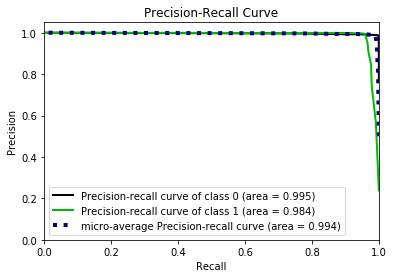

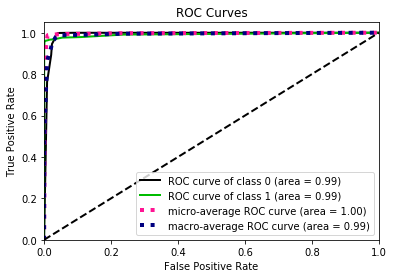

In [7]:
# train with best hypterparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
clf = RandomForestClassifier(criterion='gini',
                             n_estimators=20,
                             max_depth=None,
                             max_features=5,
                             min_samples_leaf=1,
                             min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Model Score: ", clf.score(X_test, y_test))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

import scikitplot as skplt
y_prob = clf.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_prob)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

Model Score:  0.9768
F1 Score:  0.9502003434459072
[[2833   24]
 [  63  830]]


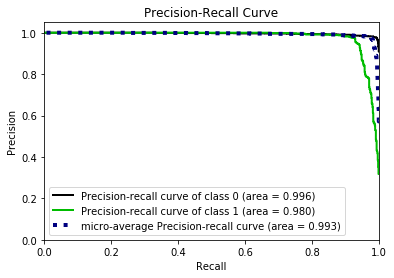

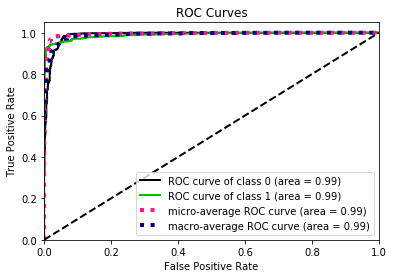

In [31]:
# default gradient tree boosting
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Model Score: ", clf.score(X_test, y_test))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

import scikitplot as skplt
y_prob = clf.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_prob)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

Model Score:  0.9584
F1 Score:  0.9119638826185101
[[2786   71]
 [  85  808]]


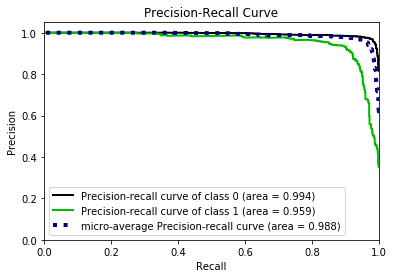

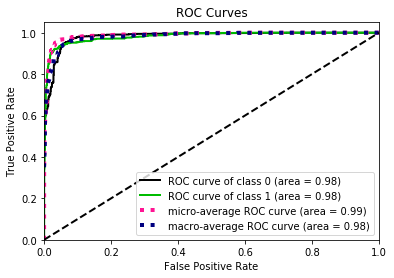

In [32]:
# default adaboost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Model Score: ", clf.score(X_test, y_test))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

import scikitplot as skplt
y_prob = clf.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_prob)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

Model Score:  0.9522666666666667
F1 Score:  0.9007210205213533
[[2759   98]
 [  81  812]]


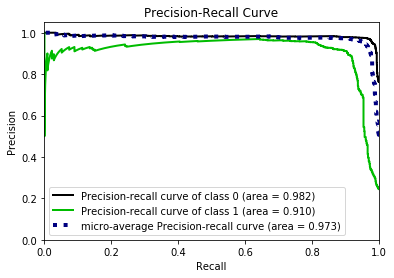

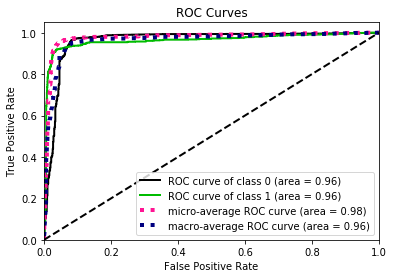

In [34]:
# default svm
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Model Score: ", clf.score(X_test, y_test))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

import scikitplot as skplt
y_prob = clf.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_prob)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()